# Black Friday

## Project Objective
- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
- The objective is to clean, prepare and analyse the Black friday Sales dataset taken from Analytics Vidhya.
- We have to analyze and the sales of an product in the retail store based on age, gender, marital status, occupation of the dataset. 


- Using Black Friday sales dataset we will try to find out following questions answer.
 1. Which age group has more purchasing of products?
 2. Which product category has been sold most?
 3. Which city_category has more purchases? 
 4. What will be the purchases with respect to staying in current city?
 
 ### Analysis Involve Phases:
  1. Data Collection
  2. Data Understanding
  3. Data Cleaning 
  4. Data Analyse

## Dataset information:
- The dataset used in this analysis contains information of transactions in a store on Black Friday, including customers' demographical features (age, gender, marital status, city type, stay in the current city), product details (productid and product category) and transaction details also total purchase amount from last month.
- The dataset comes from a competition hosted by Analytics Vidhya.
- The dataset has 783667 rows and 12 columns.

In [1]:
## Importing Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline

In [64]:
pd.set_option('display.max_rows', 530)

### Data Collection

In [2]:
final_df=pd.read_csv('Black_Friday.csv')

### Data Understanding

In [97]:
final_df.shape

(783667, 12)

In [98]:
final_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [3]:
final_df = final_df.rename(columns={'User_ID':'user_id', 
                         'Product_ID': 'product_id', 
                         'Gender': 'gender', 
                         'Age': 'age', 
                         'Occupation': 'occupation',
                         'City_Category': 'city_category', 
                         'Stay_In_Current_City_Years': 'stay_in_current_city_years', 
                         'Marital_Status':'marital_status', 
                         'Product_Category_1': 'product_category_1', 
                         'Product_Category_2': 'product_category_2',
                         'Product_Category_3': 'product_category_3',
                         'Purchase':'purchase'
                         })

In [69]:
final_df.isnull().sum()

user_id                            0
product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            245982
product_category_3            545809
purchase                      233599
dtype: int64

In [70]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     783667 non-null  int64  
 1   product_id                  783667 non-null  object 
 2   gender                      783667 non-null  object 
 3   age                         783667 non-null  object 
 4   occupation                  783667 non-null  int64  
 5   city_category               783667 non-null  object 
 6   stay_in_current_city_years  783667 non-null  object 
 7   marital_status              783667 non-null  int64  
 8   product_category_1          783667 non-null  int64  
 9   product_category_2          537685 non-null  float64
 10  product_category_3          237858 non-null  float64
 11  purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


### Observation

  1. user_id
  - Represents unique_id of the customer.
  - It is of int datatype.
  
  2. product_id
  - Represents unique_id of the product.
  - It is of Object data type.
  
  3. gender
  - Reprsents Sex of the customer.
  - It is of object datatype.
  - It is categorical type variable.
  
  4. age
  - Represents Age of the customer.
  - It is of Object datatype.
  - It is categorical type variable. 
   
  5. occupation
  - Represents Occupation code of teh customer.
  - It is of int datatype.
  - It is categorical type variable. 
  
  
  6. city_category
  - Represents city of the customer where he is residing.
  - It is of object datatype.
  - It is categorical type variable. 
  
  7. stay_in_current_city_years
  - Represents number of years of stay in city in years.
  - It is of object datatype.
  
  8. martial_status
  - Represents maritial status of customer.
  - It is of object datatype.
  
  9. product_category_1
  - Represents category of product.
  - It is of int datatype.
 
  10. product_category_2
  - Represents category of product.
  - It has 245982 null values.
  - It is of float datatype.
  
  11. product_category_3
  - Represents category of product.
  - It has 545809 null values.
  - It is of float datatype.
  
  12. purchase
  - Represents purchasing amount of the customer.
  - It has 233599 null values.
  - It is of float datatype.

### Data Cleaning

In [94]:
def data_cleaning(dataframe):

## As we are not doing analysis based on each user hence, deleting user_id column.
   dataframe.drop(['user_id'],axis=1,inplace=True)

#Handling the categorical feature Gender column
   dataframe['gender']=final_df['gender'].map({'F':0,'M':1})

# Age column have age range values, using map function giving ranks with respect to age range for example 0-17 is 1 , 18-25 is 2 and so on.
   dataframe['age']=dataframe['age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

# To handle 'Stay_In_Current_City_Years' column.We will replace 4+ with 4 years in Stay_in_current_city_years column
   dataframe['stay_in_current_city_years']=dataframe['stay_in_current_city_years'].str.replace("+"," ")

# We have to convert df['Stay_In_Current_City_Years'] column object to integer.
   dataframe['stay_in_current_city_years']=dataframe['stay_in_current_city_years'].astype(int)

## converting categories into numeric i.e replacing each city category by 0 for B, 1 for C, and B = 0 C = 1 means category A, hence removing 1 column.
   df_city = pd.get_dummies(dataframe['city_category'],drop_first=True)

# Merging column B and column C with dataframe
   dataframe = pd.concat([dataframe, df_city], axis = 1)

# converting B and C column in integer
   dataframe['B']=final_df['B'].astype(int)
   dataframe['C']=final_df['C'].astype(int)

# Dropping city_category column as we have conveted it into numerical value
   dataframe.drop('city_category',axis=1,inplace=True)


### Handling Null Values

In [ ]:
def handling_null_values(dataframe)

 factors=['product_category_1','product_category_2','product_category_3','purchase']
 test = pd.DataFrame()
 test['product_id'] = final_df['product_id'].unique()
 test['product_category_1'] = final_df.groupby('product_id')['product_category_1'].apply(lambda x: np.unique(x)).reset_index()['product_category_1']
 test['product_category_2'] = final_df.groupby('product_id')['product_category_2'].apply(lambda x: np.unique(x)).reset_index()['product_category_2'] 
 test['product_category_3'] = final_df.groupby('product_id')['product_category_3'].apply(lambda x: np.unique(x)).reset_index()['product_category_3'] 
 test
 
 #  As shown in below figure i tried to find out for each product_id's how many values corresponding are in  product_category_1, 
 # product_category_2 and product_category_3.
 
 # I found that for each particular product_id we are not able to find corresponding values for null's in product_category_2 , 
 # product_category_3 hence why we are replacing it with zero.

 # Replacing null values with zero in product_category_2 column
  final_df['product_category_2'] = final_df['product_category_2'].fillna(0)
    
 # Replacing null values with zero in product_category_3 column
  final_df['product_category_3'] = final_df['product_category_3'].fillna(0)
    
 # To handle purchase column null values and fill it with mean
  final_df['purchase'] = final_df['purchase'].fillna(test.groupby('product_id')['purchase'].transform('mean'))
    
 # After replacing purchase column with mean we found that there are 61 null values still present in purchase column.
 # As there is no rows in dataset to compute mean as their corresponding purchase column contains null values.
 # Hence for now we are deleting those records.
 
 # Alternatively in real world scenarios we might ask accounts team to check the records and give information on purchase column and replace it with correct records.
 
 # I tried to find out which product id is associated with null values.   
 # final_df[final_df.purchase.isnull()].product_id.unique()   
 
 # I checked for one of the product_id.
 # final_df[final_df.product_id.isin(['P00061642'])]

 

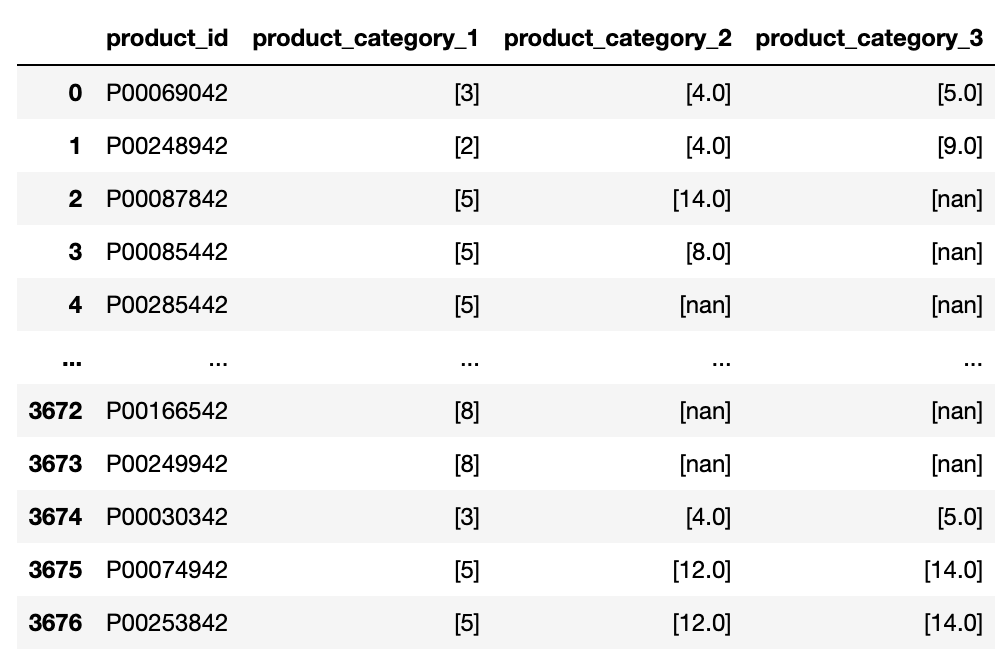

In [4]:
final_df[final_df.purchase.isnull()].product_id.unique()

array(['P00128942', 'P00113442', 'P00288442', ..., 'P00270742',
       'P00253842', 'P00325442'], dtype=object)

In [8]:
final_df[final_df.product_id.isin(['P00061642'])]

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
612299,1000075,P00061642,F,0-17,10,C,4+,0,5,NaN,NaN,NaN


In [125]:
final_df[final_df.product_id.isin(['P00100242'])]

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
557536,1005517,P00100242,M,55+,0,C,2,1,2,NaN,NaN,NaN


In [126]:
final_df[final_df.product_id.isin(['P00105742'])]

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
632126,1000438,P00105742,M,18-25,11,A,3,0,5,8.0,NaN,NaN


In [148]:
final_df['purchase'] = final_df['purchase'].fillna(0)

In [149]:
final_df.purchase.isnull().sum()

0

In [150]:
final_df.isnull().sum()

product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

### Data Analysis

#### Q.1 Which age group has  purchased more  number of products?

<AxesSubplot:xlabel='age', ylabel='purchase'>

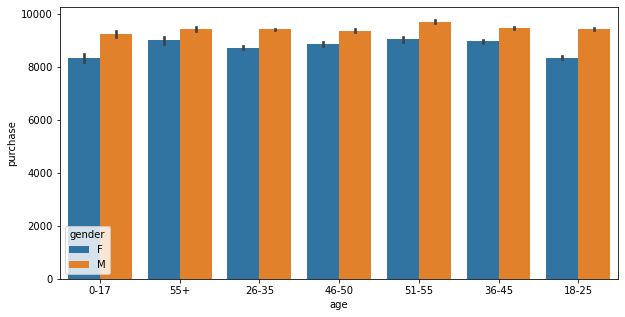

In [23]:
# Visulaisation Age vs Purchase Analysis
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='purchase', hue='gender', data=final_df)

### Observation:
- 1. Age and Purchase graph has a uniform distribution.
- 2. Purchasing of men is slightly more in age-group 51-55.

#### Q.2 Which product category has been sold most?

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_category_1', ylabel='purchase'>

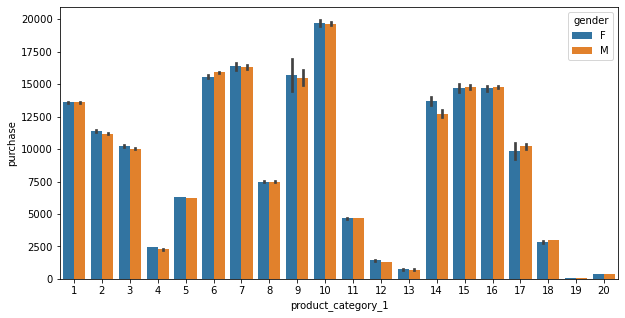

In [24]:
# Visualisation of Product_categories Vs Purchse
plt.figure(figsize=(10,5))
sns.barplot('product_category_1','purchase', hue='gender', data=final_df)

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_category_2', ylabel='purchase'>

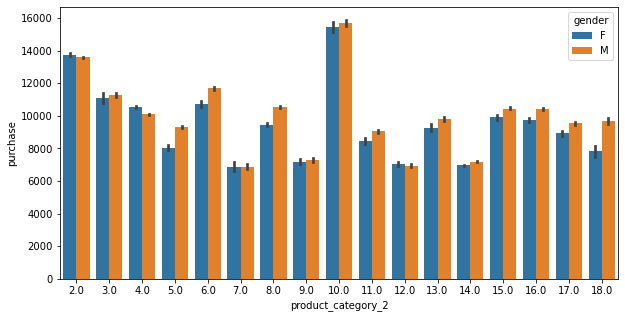

In [25]:
plt.figure(figsize=(10,5))
sns.barplot('product_category_2','purchase', hue='gender', data=final_df)

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_category_3', ylabel='purchase'>

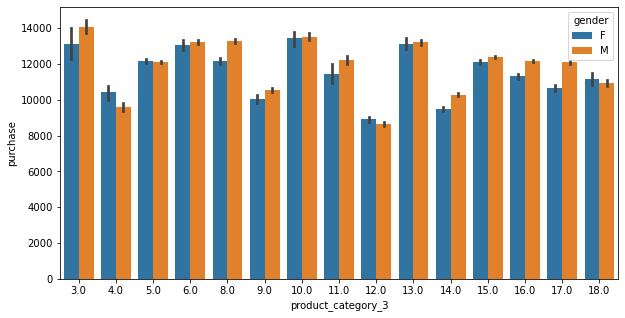

In [26]:
plt.figure(figsize=(10,5))
sns.barplot('product_category_3','purchase', hue='gender', data=final_df)

### Observation: 
- product_category_1 has been purchased more than product_category_2 and product_category_3.

#### Q.3 Which city_category has more purchases? 

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_category', ylabel='count'>

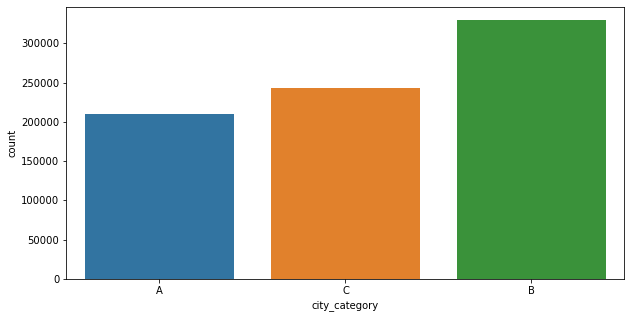

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(final_df['city_category'])

### Observation:
 - B city_category has more number of counts hence it might represents the urban area where most of the population resides.

#### Q.4 What will be the purchases with respect to staying in current city?

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stay_in_current_city_years', ylabel='count'>

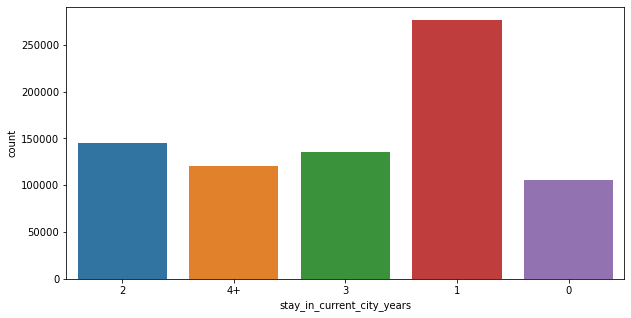

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(final_df.stay_in_current_city_years)

### Observation:
- The tendency looks like the longest someone is living in that city the less prone they are to buy new things.
- Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.